<a href="https://colab.research.google.com/github/24pratham/hamoye_stage-e_Practical-Time-Series-Analysis-Forecast/blob/main/hamoye_stage_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';',na_values = '?',
                 dtype = float ,low_memory=False,infer_datetime_format=True,parse_dates={'datetime':[0,1]},
                 index_col=['datetime'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Ckeck the missing values
df.isnull().sum()

Global_active_power      7
Global_reactive_power    7
Voltage                  7
Global_intensity         7
Sub_metering_1           7
Sub_metering_2           7
Sub_metering_3           7
dtype: int64

In [5]:
# create table
r, c = df.shape
print('Number of rows:',r)
print('Number of columns:',c)

Number of rows: 97195
Number of columns: 7


In [6]:
# Filling the missing values with mean
df = df.fillna(df.mean())

In [7]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
#resampling
daily_df = df.resample('D').sum()
print(daily_df.shape)

(352, 7)


In [9]:
daily_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [10]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.249414,-0.632360,0.998915,0.419727,0.426851,0.542573
Global_reactive_power,0.249414,1.000000,-0.163211,0.261218,0.110881,0.176250,0.091460
Voltage,-0.632360,-0.163211,1.000000,-0.638939,-0.239927,-0.214356,-0.420920
Global_intensity,0.998915,0.261218,-0.638939,1.000000,0.423824,0.431896,0.533210
Sub_metering_1,0.419727,0.110881,-0.239927,0.423824,1.000000,0.056987,0.117175
Sub_metering_2,0.426851,0.176250,-0.214356,0.431896,0.056987,1.000000,0.117628
Sub_metering_3,0.542573,0.091460,-0.420920,0.533210,0.117175,0.117628,1.000000


In [11]:
#plots

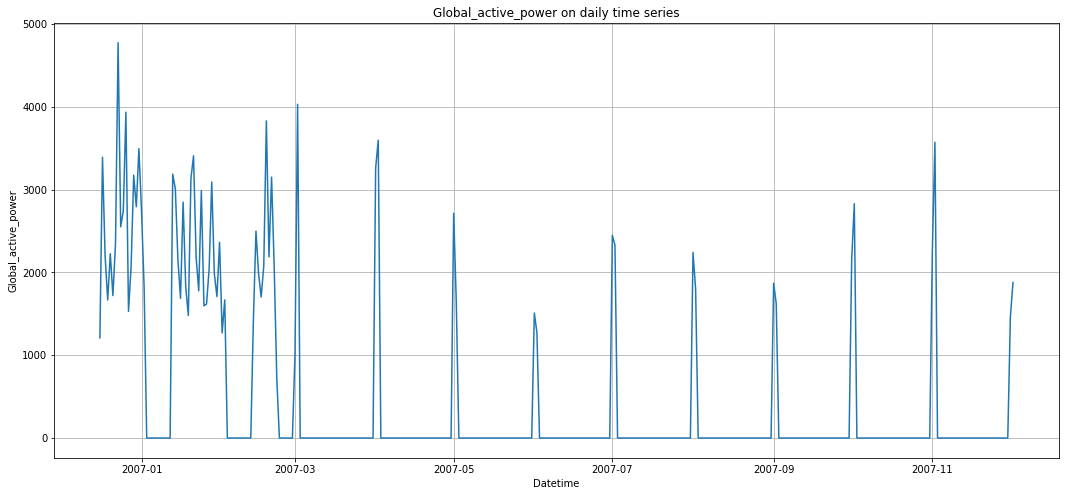

In [17]:
# Plot of Global_active_power on the daily time frame
plt.figure(figsize=(18,8))
plt.plot(daily_df.index, daily_df.Global_active_power)
plt.grid()
plt.title('Global_active_power on daily time series')
plt.xlabel("Datetime")
plt.ylabel("Global_active_power")
plt.show()

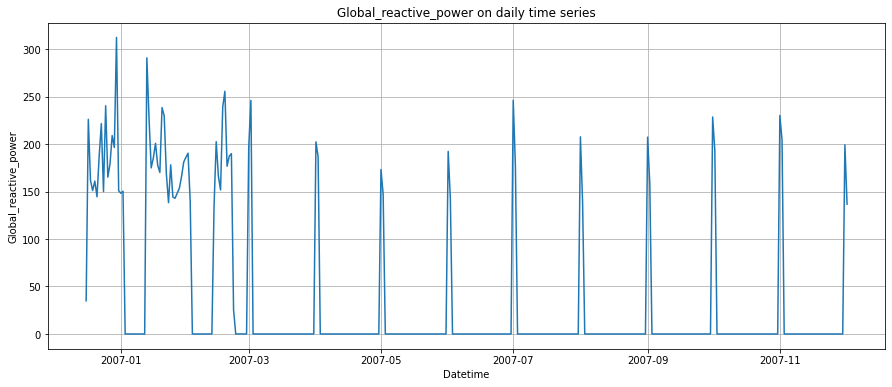

In [18]:
# Plot of Global_reactive_power on the daily time frame
plt.figure(figsize=(15,6))
plt.plot(daily_df.index, daily_df.Global_reactive_power)
plt.grid()
plt.title('Global_reactive_power on daily time series')
plt.xlabel("Datetime")
plt.ylabel("Global_reactive_power")
plt.show()

In [19]:
# Correlation

In [20]:
# between Global_active_power and Global_reactive_power
from scipy.stats import pearsonr
pearsonr(df['Global_active_power'],df['Global_reactive_power'])

(0.2494140143064995, 0.0)

In [21]:
# between Voltage and Global_intensity
from scipy.stats import pearsonr
pearsonr(df['Voltage'],df['Global_intensity'])

(-0.6389390633428518, 0.0)

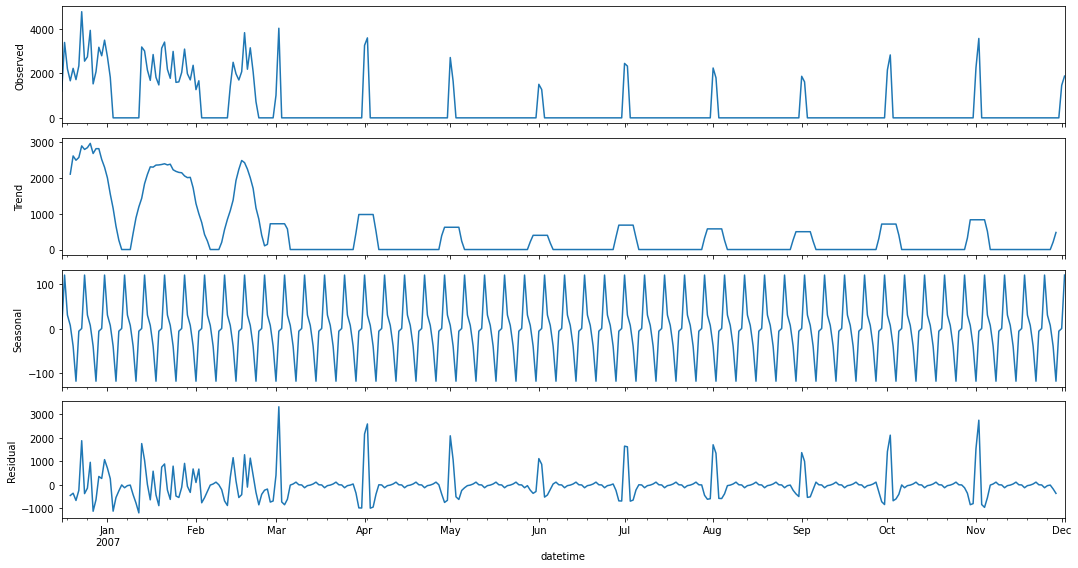

In [24]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

# Decompose daily time series
decompose_series = sm.tsa.seasonal_decompose(daily_df['Global_active_power'], model = 'additive')
decompose_series.plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(daily_df['Global_active_power'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'P-value: {adf_result[1]}')
print(f'No.lags used: {adf_result[2]}')
print(f'No. of obervation used: {adf_result[3]}')
print('Critical Vales:')
for k, v in adf_result[4].items():
    print(f'{k}:{v}:')

ADF Statistics: -5.272522619120671
P-value: 6.240817376086701e-06
No.lags used: 2
No. of obervation used: 349
Critical Vales:
1%:-3.449226932880019:
5%:-2.869857365438656:
10%:-2.571201085130664:


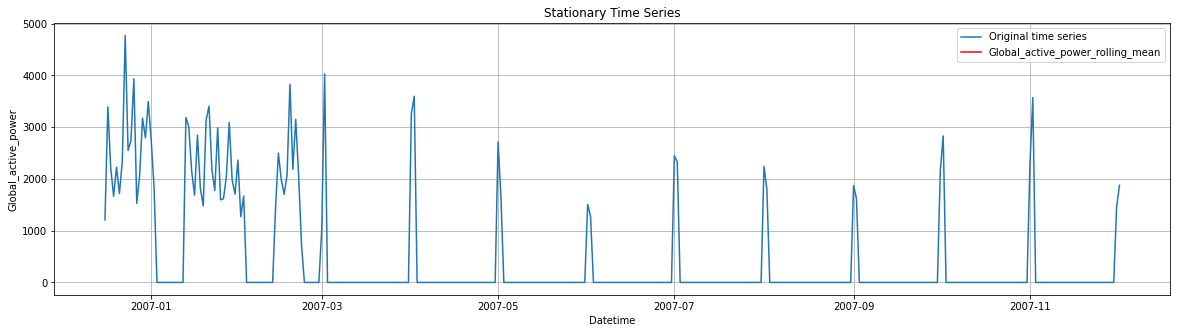

In [27]:
Global_active_power_rolling_mean = daily_df['Global_active_power'].rolling(365).mean()

# Visualise the plot
plt.figure(figsize=(20,5))
plt.title('Stationary Time Series')
plt.plot(daily_df.index, daily_df.Global_active_power, '-', label = 'Original time series')
plt.plot(Global_active_power_rolling_mean.index, Global_active_power_rolling_mean, color = 'red', label= 'Global_active_power_rolling_mean')
plt.ylabel('Global_active_power')
plt.xlabel('Datetime')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [29]:
from fbprophet import Prophet

daily_df.reset_index(inplace=True)
prophet_daily = daily_df[['datetime','Global_active_power']]

In [30]:
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

(352, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [61]:
train_set, test_set  = prophet_daily.iloc[:352,:], prophet_daily.iloc[352:,:]
print(train_set.shape)
print(test_set.shape)

(352, 2)
(0, 2)


In [63]:
model = Prophet(daily_seasonality=True)
model.fit(train_set)
pred = model.predict()
pred.head()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1317.190502,659.211782,2735.302670,1317.190502,1317.190502,445.147970,445.147970,445.147970,442.778093,442.778093,442.778093,2.369877,2.369877,2.369877,0.0,0.0,0.0,1762.338472
1,2006-12-17,1305.255163,882.644955,2945.989691,1305.255163,1305.255163,609.729816,609.729816,609.729816,442.778093,442.778093,442.778093,166.951723,166.951723,166.951723,0.0,0.0,0.0,1914.984979
2,2006-12-18,1293.319823,631.688252,2737.102741,1293.319823,1293.319823,465.972302,465.972302,465.972302,442.778093,442.778093,442.778093,23.194209,23.194209,23.194209,0.0,0.0,0.0,1759.292125
3,2006-12-19,1281.384484,761.822594,2743.660061,1281.384484,1281.384484,439.346616,439.346616,439.346616,442.778093,442.778093,442.778093,-3.431478,-3.431478,-3.431478,0.0,0.0,0.0,1720.731100
4,2006-12-20,1269.449145,678.864623,2711.341013,1269.449145,1269.449145,398.221568,398.221568,398.221568,442.778093,442.778093,442.778093,-44.556525,-44.556525,-44.556525,0.0,0.0,0.0,1667.670713


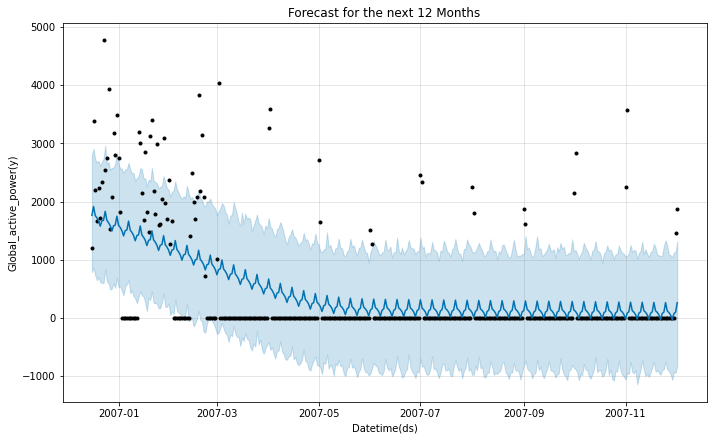

In [36]:
model.plot(pred)
plt.title('Forecast for the next 12 Months')
plt.xlabel('Datetime(ds)')
plt.ylabel('Global_active_power(y)')
plt.show()


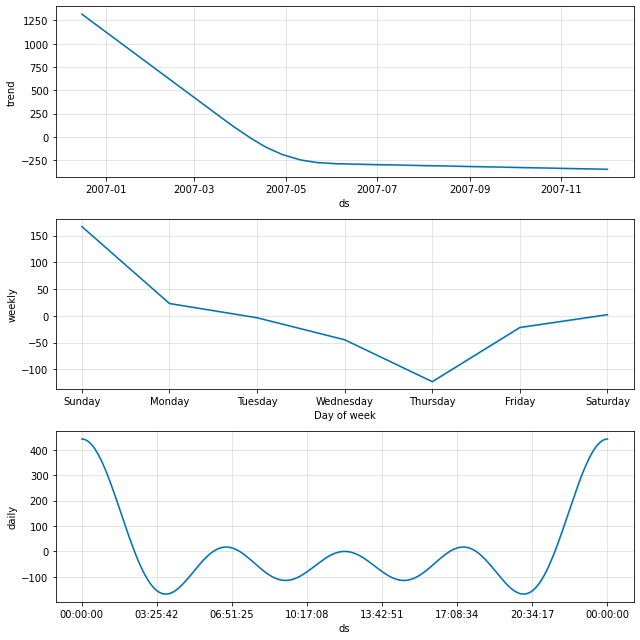

In [43]:
model.plot_components(pred)
plt.show()

In [44]:
daily_df2 = daily_df
daily_df2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [45]:
daily_df2 = daily_df2.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'attr1',
                                                'Voltage':'attr2','Global_intensity':'attr3','Sub_metering_1':'attr4',
                                                'Sub_metering_2':'attr5','Sub_metering_3':'attr6'})
daily_df2.head()

,ds,y,attr1,attr2,attr3,attr4,attr5,attr6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [46]:
train_set_2,test_set_2 = daily_df2.iloc[:1077,:], daily_df2.iloc[1077:,:]
print(train_set_2.shape)
print(test_set_2.shape)

(352, 8)
(0, 8)


In [59]:
from sklearn import metrics